In [1]:
import pandas as pd

df = pd.read_csv("../../OldDataSet.csv")

In [2]:
df

,Profile Pic,Nums/Length Username,Full Name Words,Bio Length,External Url,Private,Verified,Business,#Posts,#Followers,#Following,Fake
0,1,0.000,2,42,1,0,0,0,102,678,405,0
1,1,0.067,2,0,0,0,0,0,58,334,434,0
2,1,0.000,0,0,0,0,0,0,44,539,364,0
3,1,0.000,2,14,0,0,0,0,188,3098,286,0
4,1,0.000,2,0,0,0,0,1,496,1079,1979,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0,0.400,0,0,0,0,0,0,0,14,468,1
1396,1,0.143,3,0,0,0,0,0,20,51,423,1
1397,1,0.000,1,0,0,0,0,0,2,267,3555,1
1398,1,0.000,1,137,0,0,0,0,9,164,4058,1


In [3]:
X=df.iloc[:, 0:11].values
X

array([[1.000e+00, 0.000e+00, 2.000e+00, ..., 1.020e+02, 6.780e+02,
        4.050e+02],
       [1.000e+00, 6.700e-02, 2.000e+00, ..., 5.800e+01, 3.340e+02,
        4.340e+02],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 4.400e+01, 5.390e+02,
        3.640e+02],
       ...,
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 2.000e+00, 2.670e+02,
        3.555e+03],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 9.000e+00, 1.640e+02,
        4.058e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 2.600e+02,
        5.923e+03]])

In [4]:
y=df[['Fake']]
y

,Fake
0,0
1,0
2,0
3,0
4,0
...,...
1395,1
1396,1
1397,1
1398,1


In [5]:
from sklearn import preprocessing
X = preprocessing.normalize(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

938 938
462 462


In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [8]:
lr.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
print("TRAIN SET", lr.score(X_train, y_train))
print("TEST  SET", lr.score(X_test, y_test))

TRAIN SET 0.9434968017057569
TEST  SET 0.9415584415584416


In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y.values.ravel(), cv=4)
scores

array([0.93428571, 0.95142857, 0.94857143, 0.9       ])

In [11]:
print("Average: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average: 0.93 (+/- 0.04)


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [13]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Real','Fake']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[217   5]
 [ 22 218]]


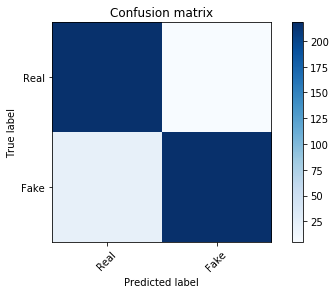

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, lr.predict(X_test))
print(cm)
plot_confusion_matrix(cm)

In [15]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print ("False Positive rate: ",false_positive_rate)
    print ("True Positive rate: ",true_positive_rate)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

False Positive rate:  [0.         0.02252252 1.        ]
True Positive rate:  [0.         0.90833333 1.        ]


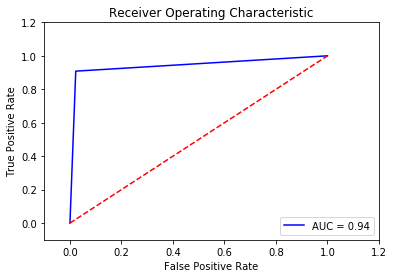

In [16]:
plot_roc_curve(y_test, lr.predict(X_test))

In [17]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       222
           1       0.98      0.91      0.94       240

    accuracy                           0.94       462
   macro avg       0.94      0.94      0.94       462
weighted avg       0.94      0.94      0.94       462

